# Experiment 2
In this exp., I focus **"simple_tag"**.  
From the expeiriment1, max_epi_len of the scenario looked too short to learn.  
Here I changed the max_epi_len.


## exp2-1
#### simple_tag__2018-03-16-_09-49-25
- max_episode_len is 400

#### simple_tag__2018-03-16-_19-15-55
- max_episode_len is 50

#### simple_tag__2018-03-16-_21-44-54
- max_episode_len is 100

## exp2-2
#### simple_tag__2018-03-18_00-16-15
- max_episode_len increases by episode (25 -> 200).
    - the episode period where the max_epi_len become twice is 5000 epi.

#### simple_tag__2018-03-18_05-29-24
- max_episode_len increases by episode (25 -> 200).
    - The episode period where the max_epi_len become twice is 10000 epi.

In [1]:
%matplotlib inline
import os
import os.path as osp
import re
import glob
from IPython.display import HTML
from IPython.display import display

exp_dir = '../exp_results/exp2_180316'
par_dir = '../params/'


def play_video(exp_dir, scenario, n_epi, width=500, height=300):
    each_exp_dir = get_exp_dir(exp_dir, scenario)
    return play_linked_video(each_exp_dir, n_epi, width, height)
    

def play_linked_video(each_exp_dir, n_epi, width=500, height=300):
    link_dir = osp.join('./videos', osp.basename(each_exp_dir))
    if osp.lexists(link_dir):
        os.remove(link_dir)
    os.symlink(osp.abspath(each_exp_dir), link_dir)
    fn_video = osp.join(link_dir, 'videos/video-%d.mp4' % n_epi)
    return _play_video(fn_video, width, height)

def _play_video(fn_video, width, height):
    print(fn_video)
    return HTML("""
    <video width="%d" height="%d" controls>
      <source src="%s" type="video/mp4">
    </video>""" % (width, height, fn_video))

def get_exp_dir(exp_dir, scenario):
    for fn in glob.glob(osp.join(exp_dir, '*')):
        if re.search(scenario + '__', fn):
            return fn


In [2]:
# plt.rcParams['font.size'] = 12

def get_scenario_df(exp_dir, scenario, fn_rewards):
    each_exp_dir = get_exp_dir(exp_dir, scenario)
    fn_lc = osp.join(each_exp_dir, 'learning_curves', fn_rewards)
    df_lc = pd.read_csv(fn_lc, index_col=False)
    return df_lc

def plot_lcs(fn_rewards, display_table=False):
    fn_scenarios = 'default_scenarios_cpu_setup1.dic'
    scenarios = eval(open(osp.join(par_dir, fn_scenarios)).read())['scenarios']
    
    fig, axes = plt.subplots(3, 3, figsize=(21, 16))
    axes = axes.flatten()
    for i, scenario in enumerate(scenarios):
        df_lc = get_scenario_df(exp_dir, scenario, fn_rewards)
        if display_table:
            display(df_lc.head(3))
        df_lc.plot(x='step', style='-o', fontsize=16, ax=axes[i], title=scenario, alpha=0.5)
    plt.tight_layout()
    
def plot_each_lc(scenario):
    fn_lcs = ['rewards.csv', 'agents_rewards.csv']
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    for i, fn_rew in enumerate(fn_lcs):
        df_lc = get_scenario_df(exp_dir, scenario, fn_rew)
        df_lc.plot(x='step', style='-o', fontsize=16, ax=axes[i], title=scenario, alpha=0.5)

def plot_each_lc2(each_exp_dir):
    fn_lcs = ['rewards.csv', 'rewards.csv', 'agents_rewards.csv']
    
    fig, axes = plt.subplots(1, 3, figsize=(21, 5))
    for i, fn_rew in enumerate(fn_lcs):
        fn_lc = osp.join(each_exp_dir, 'learning_curves', fn_rew)
        df_lc = pd.read_csv(fn_lc, index_col=False)
        df_lc.columns = [coln.strip() for coln in df_lc.columns]
        if i == 0:
            df_lc['step_per_epi'] = df_lc[['step']].diff().values / df_lc[['episode']].diff().values
            df_lc.plot(x='episode', y='step_per_epi', style='-o', fontsize=12, 
                               ax=axes[i], title=osp.basename(each_exp_dir), alpha=0.5)
        else:
            del df_lc['step']
            df_lc.plot(x='episode', style='-o', fontsize=12, ax=axes[i], title=osp.basename(each_exp_dir), alpha=0.5)
    #     break


In [3]:
from multiagent.environment import MultiAgentEnv
import multiagent.scenarios as scenarios

def action_space(scenario):
    fn = osp.join('../../../multiagent-particle-envs/multiagent/scenarios/%s.py' % scenario)
    scenario = scenarios.load(fn).Scenario()
    world = scenario.make_world()
    env = MultiAgentEnv(world, scenario.reset_world, scenario.reward, scenario.observation)
    print(env.action_space)

## Experiment 2-1

### 2-1-1. simple_tag__2018-03-16-_09-49-25
- max_episode_len is 400

#### Results
- No learning...
- Probably no hit actions fulfilled the replay buffer.
    - When the episode length is short, there are many chance to hit even if agents randomly act (since they are close at the start).
    - Longer the episdoe is, more rare the chance to hit is.
    
#### Next step
- -> 400 is too long. I will try shorter length (see 2-1-2, 2-1-3).

[Discrete(5), Discrete(5), Discrete(5), Discrete(5)]
None


None

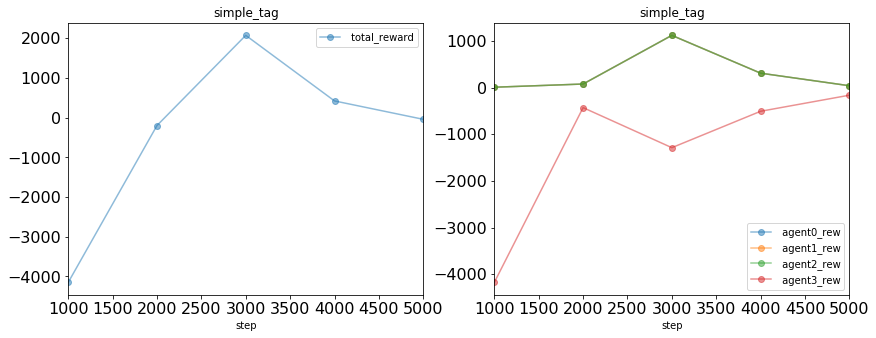

epi = 1000
./videos/simple_tag__2018-03-16-_09-49-25/videos/video-1000.mp4


epi = 3000
./videos/simple_tag__2018-03-16-_09-49-25/videos/video-3000.mp4


epi = 5000
./videos/simple_tag__2018-03-16-_09-49-25/videos/video-5000.mp4


In [4]:
scenario = 'simple_tag'
epis = [1000, 3000, 5000]

print(action_space(scenario))
display(plot_each_lc(scenario))
plt.show()

for epi in epis:
    print('epi = %d' % epi)
    display(play_video(exp_dir, scenario, n_epi = epi))

### 2-1-2. simple_tag__2018-03-16-_19-15-55
- max_episode_len is 50

#### Results
- 2 or 3 predators chase the prey.
    - better than the model of max_len=25.
        - e.g., they learn an attack on both sides (instead of a simple chase).
    - not all agents chase the green agent at the same time...
    - -> we expect more collaborative hunting for the red agents.

In [5]:
def _oldplot_each_lc2(each_exp_dir):
    fn_lcs = ['rewards.csv', 'agents_rewards.csv']
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    for i, fn_rew in enumerate(fn_lcs):
        fn_lc = osp.join(each_exp_dir, 'learning_curves', fn_rew)
        df_lc = pd.read_csv(fn_lc, index_col=False)
        df_lc.columns = [coln.strip() for coln in df_lc.columns]
        df_lc.plot(x='step', style='-o', fontsize=12, ax=axes[i], title=osp.basename(each_exp_dir), alpha=0.5)

None

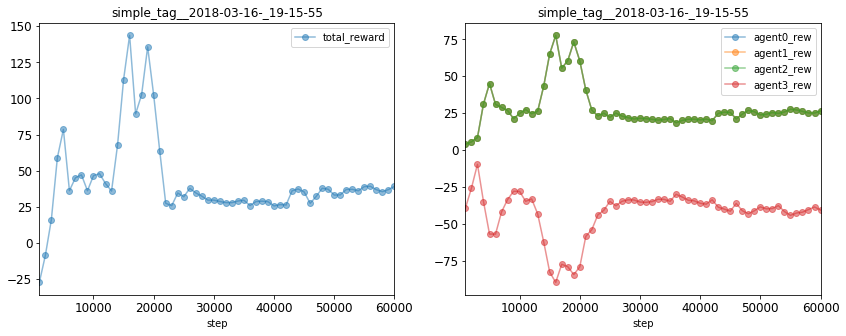

epi = 60000
./videos/simple_tag__2018-03-16-_19-15-55/videos/video-60000.mp4


In [6]:
each_exp_dir= 'simple_tag__2018-03-16-_19-15-55'
epis = [60000]

each_exp_dir = osp.join(exp_dir, each_exp_dir)
display(_oldplot_each_lc2(each_exp_dir))
plt.show()

for epi in epis:
    print('epi = %d' % epi)
    display(play_linked_video(each_exp_dir, n_epi = epi))

### 2-1-3. simple_tag__2018-03-16-_21-44-54
- max_episode_len is 100

#### Results
- 2 or 3 agents chase the green agent.
    - better than the model of max_len=25.
    - but we expect more collaborative hunting for the red agents.

None

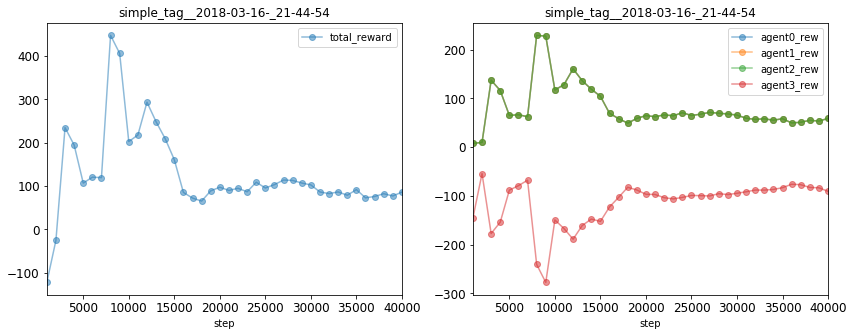

epi = 40000
./videos/simple_tag__2018-03-16-_21-44-54/videos/video-40000.mp4


In [7]:
each_exp_dir= 'simple_tag__2018-03-16-_21-44-54'
epis = [40000]

each_exp_dir = osp.join(exp_dir, each_exp_dir)
display(_oldplot_each_lc2(each_exp_dir))
plt.show()

for epi in epis:
    print('epi = %d' % epi)
    display(play_linked_video(each_exp_dir, n_epi = epi))

## Experiment 2-2

### Background
The reuslts of exp2-1 are okay.  
The results sugget that max_epi_len is the key parameter for agents  
to learn properly. This means that we need to tune the value for every scenario.   
Here I try to find an easy way to tune. In addition, I try to make the red agnets
more cooperative. 

The easiest way is to reward the red agents when they are close to the green agent.  
(Actually there is an "option" to do that in the default-scenario code.)  
But that isn't interesting: if we shape rewards in details, then the agent behaviors  
will be fixed; we would miss more interesting behaviors that the agents would take.  

The longer max_epi_len would make the red agents more cooperative, because  
they could make "a chasing plan" instead of getting shot-time rewards.  
However, when we naively extend max_epi_len, it doesnt' work (see 2-1-1).  

### Method
Considering the above characteristics, I change the max_episode_length during  
the training (short pepriod -> long period). Still there is a variable: how fast the  
max_epi_len extends. But the variable is more robust than max_epi_len.

### Results
In 2-2-1 and 2-2-2, I tried two values for the above method. The results suggest  
that case 2-2-2 is slightly better than case 2-2-1, but the trained model is robust  
to the variable. This means that I don't need much case about this variable during the training.  
In addition, the trained models of 2-2 look more cooperative than case of exp1  
(**learning a team play**).

### 2-2-1. simple_tag__2018-03-18_00-16-15
- max_episode_len increases by episode (25 -> 200).
    - the episode period where the max_epi_len become twice is 5000 epi.

#### Results
- @40,000epi, the red agents look more collaborative to chase (than exp2-1-2, 2-1-3).
    - e.g., they learn an attack on both sides with the three agents (more often).
- Note that sitll there are some unstalbe episodes (1 or 2 red agents have gone somewhere...)

None

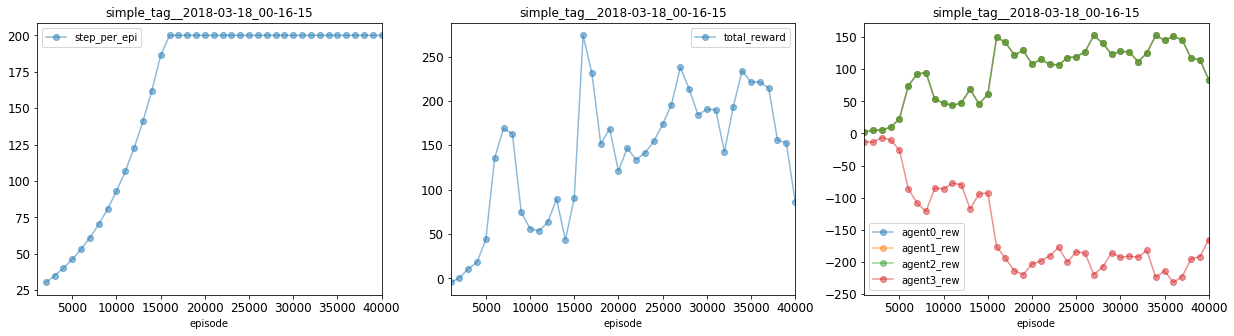

epi = 10000
./videos/simple_tag__2018-03-18_00-16-15/videos/video-10000.mp4


epi = 20000
./videos/simple_tag__2018-03-18_00-16-15/videos/video-20000.mp4


epi = 40000
./videos/simple_tag__2018-03-18_00-16-15/videos/video-40000.mp4


In [8]:
each_exp_dir= 'simple_tag__2018-03-18_00-16-15'
epis = [10000, 20000, 40000]

each_exp_dir = osp.join(exp_dir, each_exp_dir)
display(plot_each_lc2(each_exp_dir))
plt.show()


for epi in epis:
    print('epi = %d' % epi)
    display(play_linked_video(each_exp_dir, n_epi = epi))

### 2-2-2. simple_tag__2018-03-18_05-29-24
- max_episode_len increases by episode (25 -> 200).
    - The episode period where the max_epi_len become twice is 10000 epi.
    
#### Results
- almost the same as 2-2-1
- it seems a little more stable than 2-2-1, but no qualitative evaluation.

None

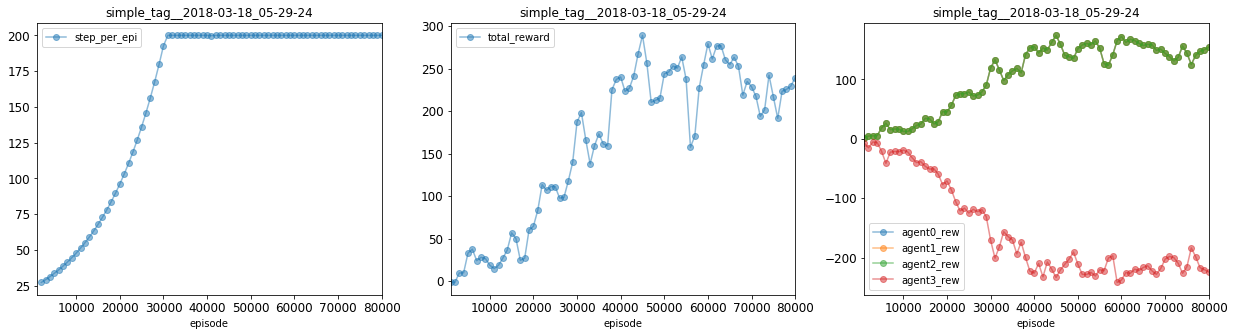

epi = 10000
./videos/simple_tag__2018-03-18_05-29-24/videos/video-10000.mp4


epi = 20000
./videos/simple_tag__2018-03-18_05-29-24/videos/video-20000.mp4


epi = 40000
./videos/simple_tag__2018-03-18_05-29-24/videos/video-40000.mp4


epi = 80000
./videos/simple_tag__2018-03-18_05-29-24/videos/video-80000.mp4


In [10]:
each_exp_dir= 'simple_tag__2018-03-18_05-29-24'
epis = [10000, 20000, 40000, 80000]

each_exp_dir = osp.join(exp_dir, each_exp_dir)
display(plot_each_lc2(each_exp_dir))
plt.show()

for epi in epis:
    print('epi = %d' % epi)
    display(play_linked_video(each_exp_dir, n_epi = epi))